<a href="https://colab.research.google.com/github/sainahah/premier-league/blob/main/Premier_league.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [ ]:
import pandas as pd


In [2]:

file_path = '/content/PremierLeague.csv'
premier_league_data = pd.read_csv(file_path)


In [ ]:
premier_league_data.head()


,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,1993-1994,14/08/1993,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-1994,14/08/1993,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-1994,14/08/1993,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-1994,14/08/1993,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-1994,14/08/1993,NaN,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DATA CLEANING**

In [ ]:
# Check for missing values
missing_values = premier_league_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (example: drop rows with missing values)
premier_league_data.dropna(inplace=True)


Missing Values:
 Season                       0
Date                         0
Time                      9880
HomeTeam                     0
AwayTeam                     0
FullTimeHomeTeamGoals        0
FullTimeAwayTeamGoals        0
FullTimeResult               0
HalfTimeHomeTeamGoals      760
HalfTimeAwayTeamGoals      760
HalfTimeResult             760
Referee                   2660
HomeTeamShots             2660
AwayTeamShots             2660
HomeTeamShotsOnTarget     2660
AwayTeamShotsOnTarget     2660
HomeTeamCorners           2660
AwayTeamCorners           2660
HomeTeamFouls             2660
AwayTeamFouls             2660
HomeTeamYellowCards       2660
AwayTeamYellowCards       2660
HomeTeamRedCards          2660
AwayTeamReadCards         2660
B365HomeTeam              3420
B365Draw                  3420
B365AwayTeam              3420
B365Over2.5Goals          8877
B365Under2.5Goals         8877
MarketMaxHomeTeam         9880
MarketMaxDraw             9880
MarketMaxAwayTeam     

In [ ]:
# Convert 'Date' column to datetime with the correct format
premier_league_data['Date'] = pd.to_datetime(premier_league_data['Date'], format='%d/%m/%Y')



In [ ]:
# Check data types of columns
print("Data Types:\n", premier_league_data.dtypes)

# Convert data types if needed
premier_league_data['FullTimeHomeTeamGoals'] = pd.to_numeric(premier_league_data['FullTimeHomeTeamGoals'])
premier_league_data['FullTimeAwayTeamGoals'] = pd.to_numeric(premier_league_data['FullTimeAwayTeamGoals'])


Data Types:
 Season                            object
Date                      datetime64[ns]
Time                              object
HomeTeam                          object
AwayTeam                          object
FullTimeHomeTeamGoals              int64
FullTimeAwayTeamGoals              int64
FullTimeResult                    object
HalfTimeHomeTeamGoals            float64
HalfTimeAwayTeamGoals            float64
HalfTimeResult                    object
Referee                           object
HomeTeamShots                    float64
AwayTeamShots                    float64
HomeTeamShotsOnTarget            float64
AwayTeamShotsOnTarget            float64
HomeTeamCorners                  float64
AwayTeamCorners                  float64
HomeTeamFouls                    float64
AwayTeamFouls                    float64
HomeTeamYellowCards              float64
AwayTeamYellowCards              float64
HomeTeamRedCards                 float64
AwayTeamReadCards                float64
B36

In [ ]:
# Example: Remove rows with invalid values
premier_league_data = premier_league_data[(premier_league_data['FullTimeHomeTeamGoals'] >= 0) & (premier_league_data['FullTimeAwayTeamGoals'] >= 0)]



**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Summary statistics for numerical columns
summary_stats = premier_league_data.describe()
print(summary_stats)


                                Date  FullTimeHomeTeamGoals  \
count                           1899            1899.000000   
mean   2022-01-12 20:58:00.568720384               1.563981   
min              2019-08-09 00:00:00               0.000000   
25%              2020-11-29 00:00:00               1.000000   
50%              2022-01-03 00:00:00               1.000000   
75%              2023-04-05 00:00:00               2.000000   
max              2024-05-19 00:00:00               9.000000   
std                              NaN               1.344108   

       FullTimeAwayTeamGoals  HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  \
count            1899.000000            1899.000000            1899.000000   
mean                1.308583               0.708268               0.586098   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 1.000000              

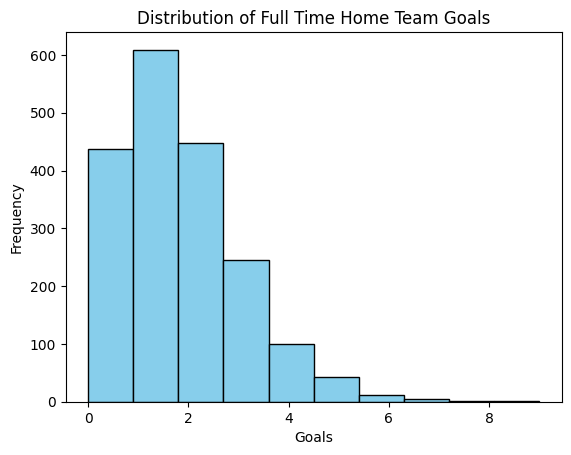

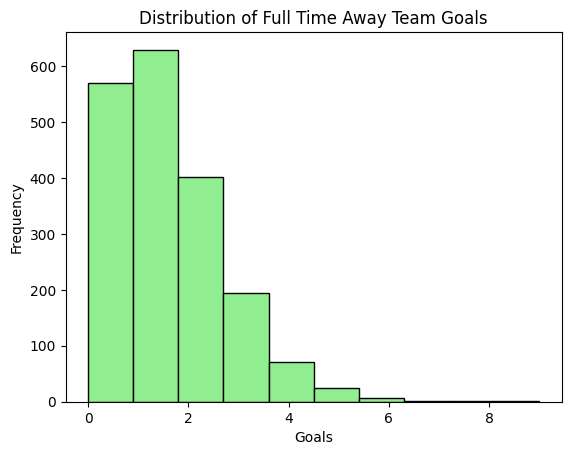

In [ ]:
import matplotlib.pyplot as plt

# Histogram of FullTimeHomeTeamGoals
plt.hist(premier_league_data['FullTimeHomeTeamGoals'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Full Time Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# Histogram of FullTimeAwayTeamGoals
plt.hist(premier_league_data['FullTimeAwayTeamGoals'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Full Time Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


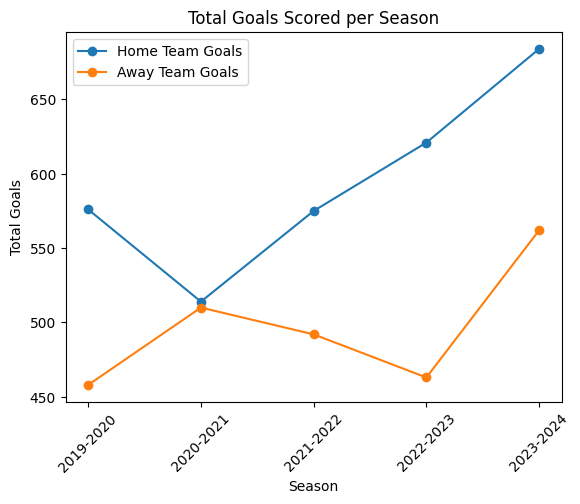

In [ ]:
# Group data by season and calculate total goals scored per season
goals_per_season = premier_league_data.groupby('Season')[['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']].sum()

# Plot total goals scored per season
plt.plot(goals_per_season.index, goals_per_season['FullTimeHomeTeamGoals'], marker='o', label='Home Team Goals')
plt.plot(goals_per_season.index, goals_per_season['FullTimeAwayTeamGoals'], marker='o', label='Away Team Goals')
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# Example: Calculate total points for each team
team_points = premier_league_data.groupby('HomeTeam')['FullTimeResult'].apply(lambda x: (x == 'H').sum() * 3 + (x == 'D').sum()).sort_values(ascending=False)
print("Total Points per Team:\n", team_points)


Total Points per Team:
 HomeTeam
Man City            234
Liverpool           229
Arsenal             197
Tottenham           188
Man United          184
Chelsea             165
Newcastle           158
Aston Villa         150
West Ham            145
Wolves              137
Everton             131
Crystal Palace      131
Brighton            129
Leicester           118
Southampton          84
Brentford            83
Burnley              77
Bournemouth          70
Leeds                69
Fulham               68
Sheffield United     59
Nott'm Forest        50
Watford              32
Norwich              27
Luton                16
West Brom            15
Name: FullTimeResult, dtype: int64


In [ ]:
# Exclude non-numeric columns from correlation matrix calculation
numeric_columns = premier_league_data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()
print("Correlation Matrix:\n", correlation_matrix)




Correlation Matrix:
                         FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
FullTimeHomeTeamGoals                1.000000              -0.151867   
FullTimeAwayTeamGoals               -0.151867               1.000000   
HalfTimeHomeTeamGoals                0.700651              -0.090159   
HalfTimeAwayTeamGoals               -0.088322               0.710078   
HomeTeamShots                        0.347832              -0.160921   
AwayTeamShots                       -0.203045               0.361411   
HomeTeamShotsOnTarget                0.612473              -0.169048   
AwayTeamShotsOnTarget               -0.172408               0.613796   
HomeTeamCorners                      0.075360              -0.095324   
AwayTeamCorners                     -0.125997               0.070835   
HomeTeamFouls                       -0.058784              -0.035107   
AwayTeamFouls                       -0.003860              -0.036901   
HomeTeamYellowCards                 -0.1299

**TEAM PERFORMANCE ANALYSIS**

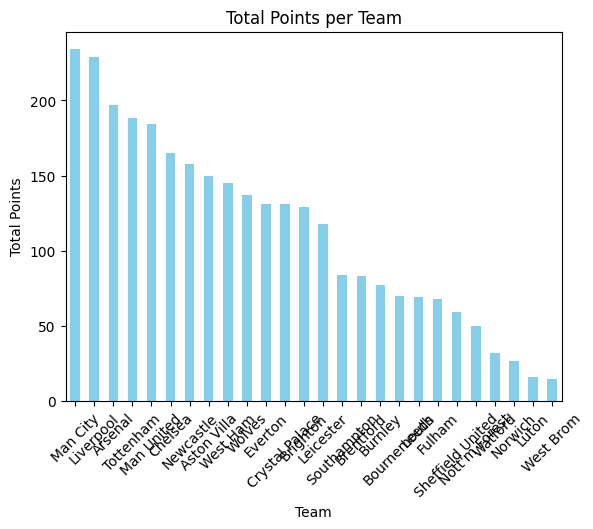

In [ ]:
# Plot total points per team
team_points.plot(kind='bar', color='skyblue')
plt.title('Total Points per Team')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.show()


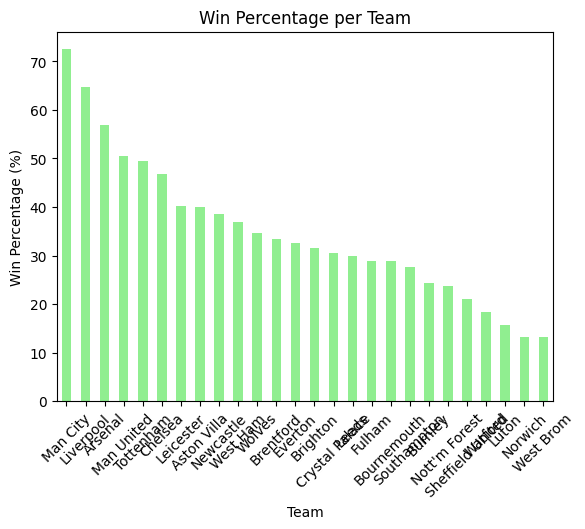

In [ ]:
# Calculate win percentage for each team
total_matches = premier_league_data.groupby('HomeTeam').size() + premier_league_data.groupby('AwayTeam').size()
total_wins = premier_league_data[premier_league_data['FullTimeResult'] == 'H'].groupby('HomeTeam').size() + premier_league_data[premier_league_data['FullTimeResult'] == 'A'].groupby('AwayTeam').size()
win_percentage = (total_wins / total_matches) * 100

# Plot win percentage per team
win_percentage.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Win Percentage per Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.show()


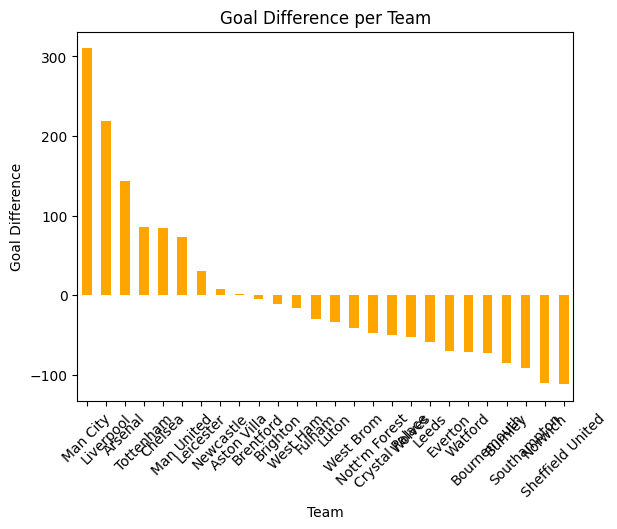

In [ ]:
# Calculate goal difference for each team
goal_difference = (premier_league_data.groupby('HomeTeam')['FullTimeHomeTeamGoals'].sum() - premier_league_data.groupby('HomeTeam')['FullTimeAwayTeamGoals'].sum()) + (premier_league_data.groupby('AwayTeam')['FullTimeAwayTeamGoals'].sum() - premier_league_data.groupby('AwayTeam')['FullTimeHomeTeamGoals'].sum())

# Plot goal difference per team
goal_difference.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Goal Difference per Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45)
plt.show()


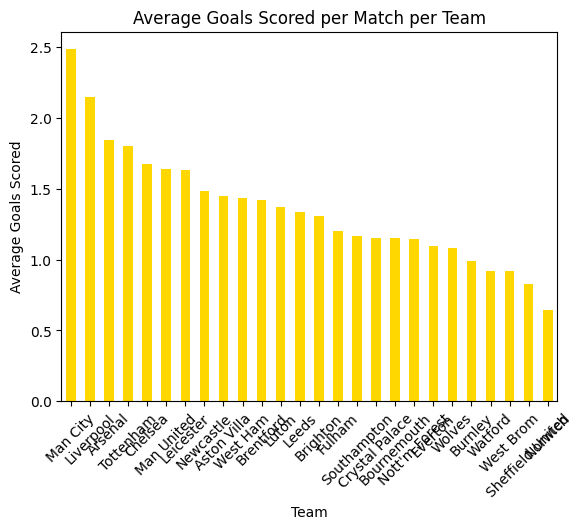

In [ ]:
# Example: Calculate average goals scored per match for each team
average_goals_scored = (premier_league_data.groupby('HomeTeam')['FullTimeHomeTeamGoals'].mean() + premier_league_data.groupby('AwayTeam')['FullTimeAwayTeamGoals'].mean()) / 2

# Plot average goals scored per match
average_goals_scored.sort_values(ascending=False).plot(kind='bar', color='gold')
plt.title('Average Goals Scored per Match per Team')
plt.xlabel('Team')
plt.ylabel('Average Goals Scored')
plt.xticks(rotation=45)
plt.show()


**MATCH ANALYSIS**

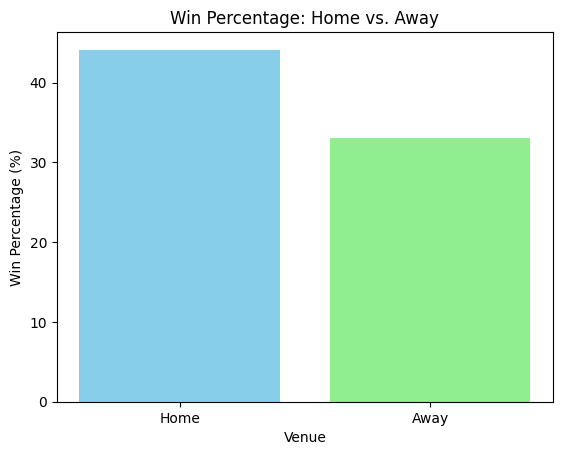

In [ ]:
#home advantage analysis
# Calculate win percentage for home and away teams
home_wins = premier_league_data[premier_league_data['FullTimeResult'] == 'H'].shape[0]
away_wins = premier_league_data[premier_league_data['FullTimeResult'] == 'A'].shape[0]
total_matches = premier_league_data.shape[0]

home_win_percentage = (home_wins / total_matches) * 100
away_win_percentage = (away_wins / total_matches) * 100

# Plot win percentage for home and away teams
plt.bar(['Home', 'Away'], [home_win_percentage, away_win_percentage], color=['skyblue', 'lightgreen'])
plt.title('Win Percentage: Home vs. Away')
plt.xlabel('Venue')
plt.ylabel('Win Percentage (%)')
plt.show()


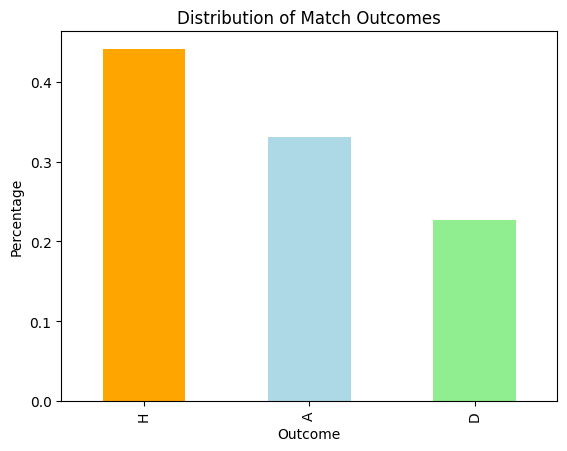

In [ ]:
# Plot distribution of match outcomes
match_outcomes = premier_league_data['FullTimeResult'].value_counts(normalize=True)
match_outcomes.plot(kind='bar', color=['orange', 'lightblue', 'lightgreen'])
plt.title('Distribution of Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.show()


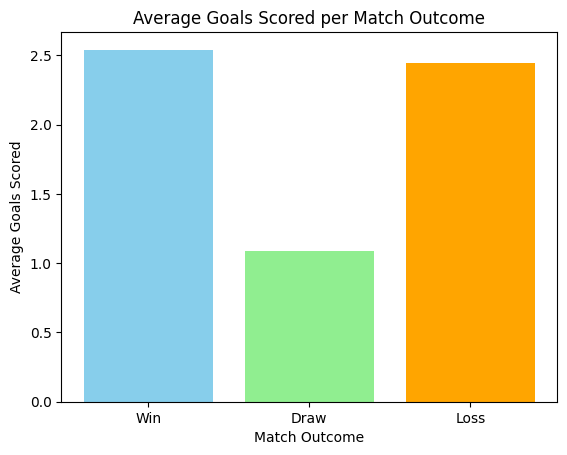

In [ ]:
# Calculate average goals scored for each match outcome
average_goals_win = premier_league_data[premier_league_data['FullTimeResult'] == 'H']['FullTimeHomeTeamGoals'].mean()
average_goals_draw = premier_league_data[premier_league_data['FullTimeResult'] == 'D'][['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']].mean().mean()
average_goals_loss = premier_league_data[premier_league_data['FullTimeResult'] == 'A']['FullTimeAwayTeamGoals'].mean()

# Plot average goals scored for each match outcome
plt.bar(['Win', 'Draw', 'Loss'], [average_goals_win, average_goals_draw, average_goals_loss], color=['skyblue', 'lightgreen', 'orange'])
plt.title('Average Goals Scored per Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Goals Scored')
plt.show()


**PREDICTIVE MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Feature Selection: Select relevant features
features = ['HomeTeam', 'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']  # Add more features as needed

# Extract features and target variable
X = premier_league_data[features]
y = premier_league_data['FullTimeResult']

# Handling Categorical Variables: One-hot encoding
X_encoded = pd.get_dummies(X)

# Splitting the Dataset: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1519, 54) (1519,)
Testing set shape: (380, 54) (380,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)


Accuracy of Logistic Regression Model: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Model:", accuracy_rf)


Accuracy of Random Forest Model: 0.9921052631578947


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1-score for Logistic Regression model
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Calculate precision, recall, and F1-score for Random Forest model
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Calculate confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred)

# Calculate confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Logistic Regression Model Evaluation:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

print("\nRandom Forest Model Evaluation:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


Logistic Regression Model Evaluation:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[135   0   0]
 [  0  82   0]
 [  0   0 163]]

Random Forest Model Evaluation:
Precision: 0.9922479391249208
Recall: 0.9921052631578947
F1-score: 0.9920677039499768
Confusion Matrix:
 [[135   0   0]
 [  0  79   3]
 [  0   0 163]]


**PREDICTION**

In [7]:
# Define target variable (Y)
y = premier_league_data['FullTimeResult']

# Select relevant features (X)
features = ['HomeTeam', 'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']  # Add more features as needed
X = premier_league_data[features]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps for categorical and numerical features
categorical_features = ['HomeTeam', 'AwayTeam']
numerical_features = ['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']

# Create pipeline for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train Logistic Regression model
logistic_regression_model.fit(X_train_processed, y_train)

# Make predictions on testing data
y_pred_lr = logistic_regression_model.predict(X_test_processed)

# Calculate accuracy of Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression Model:", accuracy_lr)

# Print classification report for Logistic Regression model
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_lr))

# Print confusion matrix for Logistic Regression model
print("Confusion Matrix for Logistic Regression Model:")
print(confusion_matrix(y_test, y_pred_lr))

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Train Random Forest model
random_forest_model.fit(X_train_processed, y_train)

# Make predictions on testing data
y_pred_rf = random_forest_model.predict(X_test_processed)

# Calculate accuracy of Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy of Random Forest Model:", accuracy_rf)

# Print classification report for Random Forest model
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix for Random Forest model
print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy of Logistic Regression Model: 1.0
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       688
           D       1.00      1.00      1.00       567
           H       1.00      1.00      1.00      1101

    accuracy                           1.00      2356
   macro avg       1.00      1.00      1.00      2356
weighted avg       1.00      1.00      1.00      2356

Confusion Matrix for Logistic Regression Model:
[[ 688    0    0]
 [   0  567    0]
 [   0    0 1101]]

Accuracy of Random Forest Model: 0.99830220713073
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       688
           D       1.00      0.99      1.00       567
           H       1.00      1.00      1.00      1101

    accuracy                           1.00      2356
   macro avg       1.00      1.00      1.00      2

In [10]:
import joblib

# Save Logistic Regression model to disk
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')

# Save Random Forest model to disk
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [4]:
import pandas as pd

# Assuming premier_league_data is the DataFrame containing the original dataset

# Select a subset of rows for upcoming matches
upcoming_matches_subset = premier_league_data.sample(n=1000, random_state=42)  # Selecting 3 random matches as an example

# Display the subset of upcoming matches
print(upcoming_matches_subset)



         Season        Date Time    HomeTeam       AwayTeam  \
6686  2010-2011  22/01/2011  NaN  Man United     Birmingham   
4080  2003-2004  20/03/2004  NaN     Arsenal         Bolton   
4782  2005-2006  22/01/2006  NaN  Man United      Liverpool   
8188  2014-2015  11/01/2015  NaN     Arsenal          Stoke   
2847  2000-2001  23/12/2000  NaN  Sunderland       Man City   
...         ...         ...  ...         ...            ...   
1516  1996-1997  11/05/1997  NaN   Newcastle  Nott'm Forest   
8749  2016-2017  15/08/2016  NaN     Chelsea       West Ham   
3116  2001-2002  13/10/2001  NaN  Sunderland     Man United   
9210  2017-2018  28/10/2017  NaN     Arsenal        Swansea   
2239  1998-1999  24/04/1999  NaN   Leicester       Coventry   

      FullTimeHomeTeamGoals  FullTimeAwayTeamGoals FullTimeResult  \
6686                      5                      0              H   
4080                      2                      1              H   
4782                      1         

In [11]:
import joblib

# Load trained Logistic Regression model from disk
logistic_regression_model = joblib.load('logistic_regression_model.pkl')

# Load trained Random Forest model from disk
random_forest_model = joblib.load('random_forest_model.pkl')

# Preprocess new data (replace X_new with your new data)
X_new_processed = preprocessor.transform(upcoming_matches_subset)

# Make predictions using Logistic Regression model
predictions_lr = logistic_regression_model.predict(X_new_processed)

# Make predictions using Random Forest model
predictions_rf = random_forest_model.predict(X_new_processed)

# Print predictions
print("Predictions using Logistic Regression model:", predictions_lr)
print("Predictions using Random Forest model:", predictions_rf)


Predictions using Logistic Regression model: ['H' 'H' 'H' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'H' 'D' 'D' 'A' 'D'
 'H' 'A' 'A' 'A' 'D' 'A' 'H' 'D' 'H' 'H' 'H' 'H' 'D' 'D' 'H' 'H' 'H' 'D'
 'A' 'H' 'A' 'H' 'A' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'H' 'A' 'A' 'A' 'A' 'H'
 'H' 'H' 'D' 'H' 'A' 'A' 'A' 'H' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'A' 'H'
 'A' 'H' 'A' 'A' 'D' 'H' 'D' 'A' 'D' 'H' 'H' 'H' 'A' 'H' 'D' 'H' 'D' 'D'
 'H' 'D' 'H' 'H' 'H' 'D' 'H' 'H' 'H' 'A' 'D' 'H' 'D' 'A' 'H' 'H' 'A' 'A'
 'D' 'A' 'H' 'H' 'H' 'D' 'H' 'A' 'D' 'H' 'A' 'H' 'H' 'D' 'D' 'D' 'H' 'A'
 'D' 'H' 'H' 'D' 'A' 'A' 'D' 'H' 'D' 'H' 'A' 'H' 'H' 'D' 'A' 'A' 'H' 'A'
 'D' 'A' 'H' 'D' 'A' 'D' 'A' 'A' 'A' 'H' 'H' 'D' 'A' 'H' 'H' 'D' 'D' 'A'
 'A' 'H' 'D' 'H' 'H' 'D' 'D' 'A' 'A' 'D' 'H' 'H' 'H' 'D' 'H' 'A' 'A' 'H'
 'H' 'D' 'H' 'A' 'D' 'H' 'H' 'A' 'D' 'H' 'A' 'D' 'H' 'H' 'D' 'A' 'A' 'A'
 'H' 'D' 'A' 'A' 'H' 'D' 'H' 'A' 'H' 'H' 'H' 'A' 'D' 'H' 'H' 'D' 'A' 'H'
 'H' 'H' 'D' 'H' 'D' 'A' 'H' 'D' 'D' 'H' 'A' 'H' 'H' 'H' 'A' 'D' 'D' 'D'
 'H' '